In [101]:
import numpy as np
from sklearn.linear_model import LinearRegression, MultiTaskLasso, HuberRegressor
import matplotlib.pyplot as plt

In [4]:
l = 100
inputs = np.random.normal(loc=0, scale=2, size=(100,4))
weight = np.array([[1,0,1], [1,-1,0], [0,0,1], [1,0,0] ])
bias = np.array([-1,1,1])

gens = np.matmul(inputs,weight) + bias
np.shape(gens)

(100, 3)

In [106]:
model = HuberRegressor(alpha=0.0001)
coeff = []
for i in range(len(gens[0])):
    model.fit(inputs, gens[:,i])
    coeff.append( model.coef_ )

In [109]:
W = np.asarray(coeff)

In [10]:
model.score(inputs, gens)

0.9162887490822329

In [110]:

R= W
np.shape(W)
R = np.abs(W)

In [111]:
np.sum(W, axis=0) #axis= 0 scorre su righe, axis=1 scorre su colonne

array([2.00000000e+00, 2.01027357e-11, 1.00000000e+00, 1.00000000e+00])

generative $K=3$, latent $D=4$ 

In [112]:
R_g =  np.sum(R, axis=0)
R_g

array([2., 2., 1., 1.])

In [113]:
P = np.zeros(shape=np.shape(W))

In [114]:
for i in range(len(P)):
    for j in range(  len(P[0] )):
        ########################
        P[i,j] = R[i,j]/R_g[j]

In [115]:
H_D = np.zeros(shape=(3,))
for j in range(3):
    H_D[j] = -np.sum(P[:,j]*np.log(P[:,j] +10**-4 ) )

In [116]:
H_D /= np.log(4)
H_D

array([ 4.99855745e-01,  4.99855745e-01, -7.21309169e-05])

In [117]:
1- H_D

array([0.50014426, 0.50014426, 1.00007213])

In [118]:
P[:,1]

array([5.00000000e-01, 5.00000000e-01, 9.99863226e-12])

In [119]:
rho = np.zeros(3)

R_tot = np.sum(R)    
rho = np.sum(R, axis=0)/R_tot

In [120]:
R_tot

6.000000000089064

In [121]:
rho

array([0.33333333, 0.33333333, 0.16666667, 0.16666667])

In [122]:
D = np.dot(1-H_D, rho)

ValueError: shapes (3,) and (4,) not aligned: 3 (dim 0) != 4 (dim 0)

In [104]:
D

0.5490323248907051

In [176]:
def Interpretability(z, g, rel_factors=10 ** 4):
    '''
    Compute the interpretability score of the latent factors given the generative ones.
    It can be done on a restricted number of entries.
    '''

    D = len(z[0])
    K = len(g[0])

    model = HuberRegressor()
    coeff = np.zeros(shape=(D,K))
    total_acc = 0
    for i in range(K):
        model.fit(z, g[:, i])
        coeff[:,i] = model.coef_
        total_acc += model.score(z,g[:,i])
    
    print('# Interpret score # Total accuracy of Regressor model:', total_acc/K)
    # print('Regression score:',model.score(z,g)*100,'%')

    R = np.abs(coeff)

    R_g = np.sum(R, axis=0)

    P = np.zeros(np.shape(R))
    for i in range(D):
        for j in range(K):
            P[i, j] = R[i, j] / (R_g[j] + 10 ** -6)

    H_D = np.zeros(K)
    for j in range(K):
        P[:, j] += 10 ** -6
        for i in range(D):
            if P[i, j] > 1: P[i, j] = 1
        H_D[j] = - np.sum(P[:, j] * np.log(P[:, j]))

    I = 1 - H_D / np.log(D)

    rho = np.sum(R, axis=0) / np.sum(R + 10 ** -6)

    I_tot = np.sum(rho * I)

    return I, I_tot, model

In [181]:
g = np.random.uniform(0,2, size=(1000,2) )
W = np.array( [[1, 1,0,1], [0,1,0,0]]   )
z = np.matmul(g,W)

In [182]:
I, I_tot, my_model = Interpretability(z,g)

# Interpret score # Total accuracy of Regressor model: 1.0


In [183]:
I

array([0.49998029, 0.24998971])

In [184]:
I_tot

0.33331901613779646

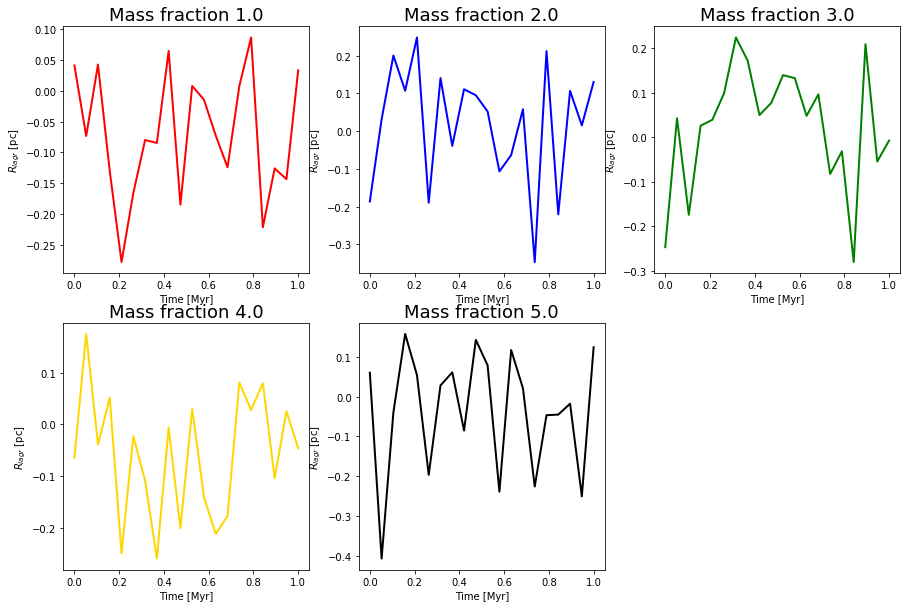

In [211]:
import matplotlib.pyplot as plt


mean_lagr_radii = np.zeros(shape=(20,5))

#### REMOVE ####
lagrangian_radii= np.random.normal(0,1, size=(1000,5))
time_myr_mean=np.linspace(0,1,20)
mass_fraction = [1,2,3,4,5,6]
fig = plt.figure(figsize=(15,10))
colors = ['red', 'blue', 'green', 'gold', 'black']
########

for i in range(5):
    lagrangian_radii_intervals = np.array_split(lagrangian_radii[:,i],20)
    
    mean_lagr_radii[:,i] = np.mean( lagrangian_radii_intervals, axis=1)
    
for i in range(5):
    fig.add_subplot(2,3,i+1)
    plt.plot(time_myr_mean, mean_lagr_radii[:,i], color=colors[i], linewidth=2, alpha=1)
    plt.xlabel("Time [Myr]", fontsize=10)
    plt.ylabel("$R_{lagr}$ [pc]", fontsize=10)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.title("Mass fraction %.1f"%mass_fraction[i], fontsize=18)
    plt.savefig('{}/plots/Averaged_lagrangian_radii.png'.format(path))

In [192]:
a = np.array_split(lagrangian_radii, 20)

In [196]:
m = np.mean(a, axis=1)

In [197]:
np.shape(m)

(20,)